Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

<div class="alert alert-block alert-danger">
Para praticar programação, é importante que você erre, leia as mensagens de erro e tente corrigí-los.
    
Dessa forma, no Google Colab, é importante que você DESATIVE OS RECURSOS DE AUTOCOMPLETAR:

- Menu Ferramentas -> Configurações
- Na janela que é aberta:
  - Seção Editor -> Desativar "Mostrar sugestões de preenchimento de código com base no contexto"
  - Seção Assistência de IA -> Desabilitar itens

Na versão em inglês:

- Menu Tools -> Settings
- Na janela que é aberta:
  - Seção Editor -> Desativar "Show context-powered code completions"
  - Seção AI Assistance -> Desabilitar itens
</div>

# PSI5892 - Aula de Exercícios

# Algoritmo LMS e modos de treinamento

Neste exercício vamos utilizar o algoritmo LMS no problema de classificação das meias-luas considerando os modos de treinamento estocástico, batch e mini-batch.

Iniciamos importando as bibliotecas necessárias para implementar o algoritmo LMS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema das meias-luas.

In [2]:
def meias_luas(NA, NB, r1, r2, r3):
    """
    dados = meias_luas(NA,NB,r1,r2,r3)
    NA: número de pontos da região A
    NB: número de pontos da região B
    r1, r2 e r3: dados das meias-luas
    """

    Nt = NA + NB  # total de dados de treinamento

    # dados das meia luas
    rmin = r1 - r3 / 2
    rmax = r1 + r3 / 2

    # Pontos da Região A
    a = np.pi * np.random.rand(NA, 1)
    rx1x2 = np.random.uniform(rmin, rmax, (NA, 1))
    x1A = rx1x2 * np.cos(a)
    x2A = rx1x2 * np.sin(a)
    dA = np.ones((NA, 1))
    pontosA = np.hstack((x1A, x2A, dA))

    # Pontos da Região B
    a = np.pi * np.random.rand(NB, 1)
    rx1x2 = np.random.uniform(rmin, rmax, (NB, 1))
    x1B = rx1x2 * np.cos(a) + r1
    x2B = -rx1x2 * np.sin(a) - r2
    dB = -np.ones((NB, 1))
    pontosB = np.hstack((x1B, x2B, dB))

    # Concatenando e embaralhando os dados
    dados = np.vstack((pontosA, pontosB))
    np.random.shuffle(dados)

    # Figura para mostrar os dados de treino
    fig, ax1 = plt.subplots()
    ax1.plot(x1A, x2A, ".b")
    ax1.plot(x1B, x2B, ".r")
    plt.xlabel("x1")
    plt.ylabel("x2")
    #plt.grid(axis="x", color="0.5")
    #plt.grid(axis="y", color="0.5")

    return dados

Gera dados de treinamento

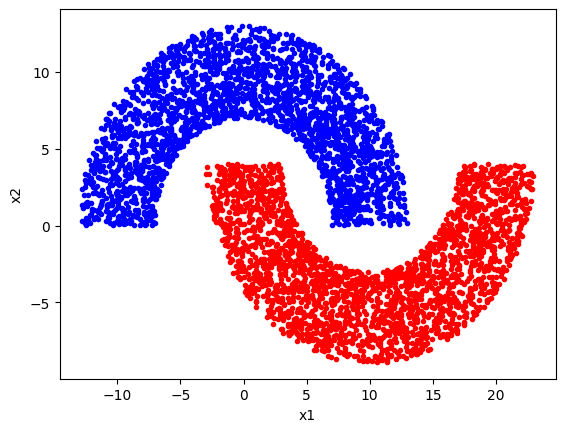

In [3]:
NA = 2500
NB = 2500
Nt = NA + NB  # número de dados de treinamento
r1 = 10
r3 = 6
r2 = -4

dados_treino = meias_luas(NA, NB, r1, r2, r3)

In [4]:
# organizando os dados para entrada do LMS
x = dados_treino[:, [0, 1]]  # sinal de entrada
d = dados_treino[:, [2]]  # sinal desejado

## **Solução de Wiener**

A função abaixo calcula a Solução de Wiener. Novamente, não é usual considerar um bias, mas como vamos inserir isso no LMS, vamos fazer o mesmo aqui.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [5]:
# Função que obtém a solução de Wiener
def Wiener(x, d, Nt):
    """
    W_Wiener = Wiener(x,d,M,Nt)
    x: sinal de entrada
    d: sinal desejado
    Nt: número de dados de treinamento
    """

    M = x.shape[1]
    # inserimos uma coluna de uns ao vetor de entrada para levar em conta o bias
    x = np.hstack((np.ones((Nt, 1)), x))

    R = np.zeros((M + 1, M + 1))
    p = np.zeros((M + 1, 1))

    for index in range(Nt):
      xn = x[index, :].reshape(M + 1, 1)
      dn = d[index]
      R += xn @ xn.T
      p += xn * dn

    R = R / Nt
    p = p / Nt

    W_Wiener = np.linalg.solve(R, p)

    return W_Wiener


In [6]:
Ww = Wiener(x, d, Nt)
print(Ww)

[[-0.10101075]
 [-0.02911634]
 [ 0.1248481 ]]


## **Modo estocástico**

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [7]:
## Função que implementa o algoritmo LMS no modo de treinamento estocástico
def LMS_FILTER_estocastico(x, d, eta, Nt):
    """
    y, e, W = LMS_FILTER_estocastico(x,d,eta,M,Nt)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    """
    M = x.shape[1]
    # inserimos uma coluna de uns ao vetor de entrada para levar em conta o bias
    x = np.hstack((np.ones((Nt, 1)), x))

    W = np.zeros((Nt + 1, M + 1))


    #############
    # Complete o código

    W_all = np.zeros((Nt,M+1))
    y_all = np.zeros((Nt,1))
    e_all = np.zeros((Nt,1))

    W = np.zeros((M+1, 1))  # (3,1)
    epochs = 1
    for _ in range(epochs):
        for index in range(1, Nt):
            xn = x[index, :].reshape(-1, 1)
            dn = d[index]
            y = W.T @ xn
            e = dn - y
            W = W + eta * xn * e

            W_all[index, :] = W.flatten()
            y_all [index] = y
            e_all [index] = e


    #############

    return y_all, e_all, W_all



Algumas observações:


*   Em filtragem adaptativa, é comum considerar uma linha de atrasos no sinal de entrada, como foi explicado no material sobre o algoritmo LMS. No entanto, para a aplicação de classificação considerada aqui, não faz sentido considerar uma linha de atrasos.
*   Também não é usual inserir o bias ao sinal de entrada como fizemos aqui.
*   Inserimos o bias aqui porque estamos interessados em usar o algoritmo LMS como um modelo de um neurônio linear.



Precisamos definir o passo de adaptação e número de pesos. No caso, vamos considerara M=2 já que temos um vetor de tamanho 2 na entrada do algoritmo.

In [8]:
eta = 1e-3  # passo de adaptação do LMS
y_all, e_all, We  = LMS_FILTER_estocastico(x, d, eta, Nt)

Mostra no mesmo gráfico gráfico dos pesos e bias do algoritmo LMS e da solução de Wiener.

Text(0.5, 1.0, 'Pesos do LMS (em preto) e pesos da Solução em Wiener (em vermelho tracejado)')

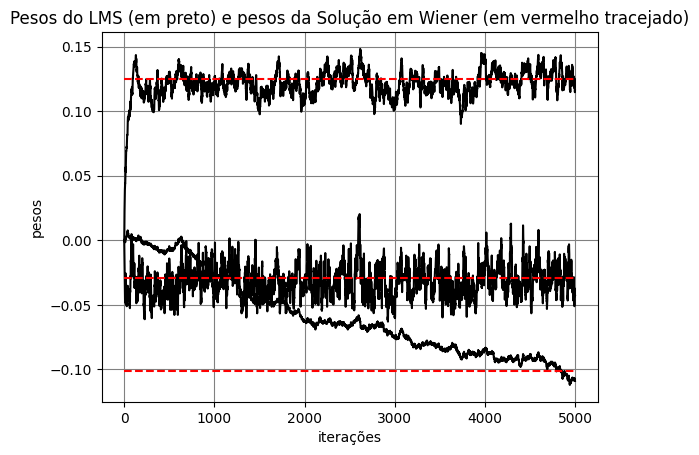

In [9]:
# Mostra os pesos ao longo do treinamento
# Obtém a solução de Wiener e plota junto com os pesos
plt.plot(We, "k", label="LMS")
#plt.plot(We, color='blue', label="LMS")
plt.plot(
    [0, Nt],
    [Ww[0], Ww[0]],
    "r--",
    [0, Nt],
    [Ww[1], Ww[1]],
    "r--",
    [0, Nt],
    [Ww[2], Ww[2]],
    "r--",
    label="Wiener",
)
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos do LMS (em preto) e pesos da Solução em Wiener (em vermelho tracejado)"
)

## **Reta de separação**

Vamos gerar dados de teste e verificar como é feita a separação com a solução de Wiener.

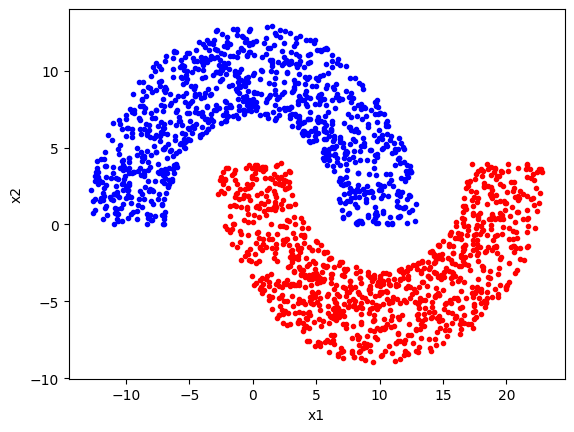

In [10]:
# Dados de teste
NAt = 1000
NBt = 1000
Nteste = NAt + NBt
r1 = 10
r3 = 6
r2 = -4

dados_teste = meias_luas(NAt, NBt, r1, r2, r3)

In [11]:
# Inserindo 1's no vetor de entrada
xteste = dados_teste[:, 0:2]  # sinal de entrada
b = np.ones((Nteste, 1))
xteste = np.hstack((b, xteste))
dteste = dados_teste[:, 2].reshape(-1, 1)  # sinal desejado
yteste = xteste @ Ww  # saída do filtro de Wiener considerando os dados de teste

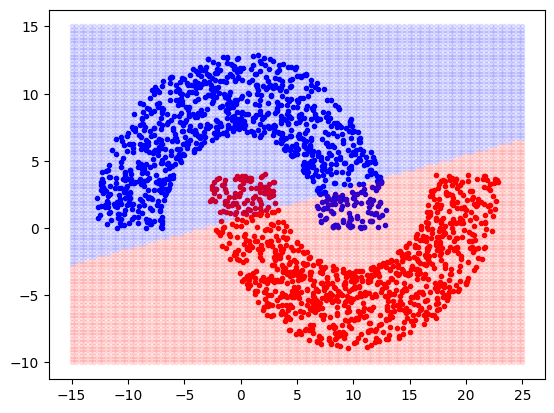

In [12]:
# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-15, 25, Nsep).reshape(-1, 1)
x2S = np.linspace(-10, 15, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Ww)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(Nteste):
    if dteste[i] == 1:
        ax2.plot(xteste[i, 1], xteste[i, 2], ".b")
    else:
        ax2.plot(xteste[i, 1], xteste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [38]:
#############
#Taxa_de_erro =
#############


"""
    classif     funcao classifica
    W           coeficientes
    x-bias      vetor de entrada
"""
def classif(W, x_bias):
    W = W.reshape(1,-1)

    x_bias.reshape(-1,len(W))
    y = x_bias @ W.T

    y_class = np.where(y >= 0, 1, -1)
    return y_class

"""
    tx_e_classif  funcao estima taxa de erro de classificacao
    d             label da classificação
    y_class       classificação usando os coeficientes
"""


def tx_e_classif(d, y_class):
    erros = np.sum(d.reshape(-1, 1) != y_class)
    return erros / len(d)


y_class_ha = classif(We[-1], xteste)
Taxa_de_erro = tx_e_classif(dteste, y_class_ha)



print(f"Taxa de erro: {Taxa_de_erro:.2%}")

Taxa de erro: 11.45%


<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

Plote um gráfico com a reta de separação, considerando os valores dos pesos da última iteração em vez dos valores obtidos pela solução de Wiener. Note que o `yteste` deve ser recalculado com os últimos valores de `We`.

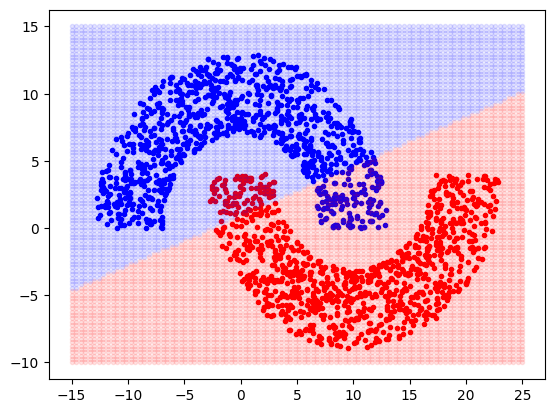

In [43]:
#############

# Inserindo 1's no vetor de entrada

W_lms_e = We[-1]
W_lms_e = W_lms_e.reshape(1,-1)

# y atualizado considerando wlms estocastico
yteste2 = xteste @ W_lms_e.T

# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-15, 25, Nsep).reshape(-1, 1)
x2S = np.linspace(-10, 15, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ W_lms_e.T)    #HA

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(Nteste):
    if dteste[i] == 1:
        ax2.plot(xteste[i, 1], xteste[i, 2], ".b")
    else:
        ax2.plot(xteste[i, 1], xteste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)



#############

## **Modo batch**

Vamos modificar a função anterior para considerar o modo de treinamento batch.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [91]:
def LMS_FILTER_batch(x, d, eta, Nt, Ne):
    """
    W = LMS_FILTER_batch(x,d,eta,M,Nt)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    """
    """
    No modo de treinamento batch, é conveniente juntar o sinal de entrada e o sinal
    desejado em um único vetor, uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """
    M = x.shape[1]
    Xd = np.hstack((np.ones((Nt, 1)), x, d))
    W = np.zeros((Ne + 1, M + 1))
    # No modo batch, o passo de adaptação é dividido por Nt
    eta = eta / Nt
    for k in range(Ne):
        np.random.shuffle(Xd)
        #############
        xb = Xd[:,:M+1]
        print("\nShape xb",xb.shape)
        db = Xd[M+1]
        db = db.reshape(-1,1)
        print("\nShape db", d.shape)
        eb = db - np.dot(xb,  W[k, :].T)
        print("\nShape eb",eb.shape)
        W[[k + 1], :] = W[k, :] - (eta/Nt) * np.dot(xb.T , eb)
        print("\nShape W",W.shape)
        #############
    return W



Vamos definir o número de épocas e o passo de adaptação (que agora pode ser um pouco maior) e rodar o algoritmo LMS no modo batch.

In [92]:
Ne = 1000
eta = 1e-2



Wb = LMS_FILTER_batch(x, d, eta, Nt, Ne)


Shape xb (5000, 3)

Shape db (5000, 1)

Shape eb (4, 5000)


ValueError: shapes (3,5000) and (4,5000) not aligned: 5000 (dim 1) != 4 (dim 0)

A seguir comparamos os pesos obtidos com o LMS no modo batch e os pesos da solução de Wiener.

Text(0.5, 1.0, 'Pesos do LMS no modo batch (em preto) e pesos da Solução em Wiener (em vermelho tracejado)')

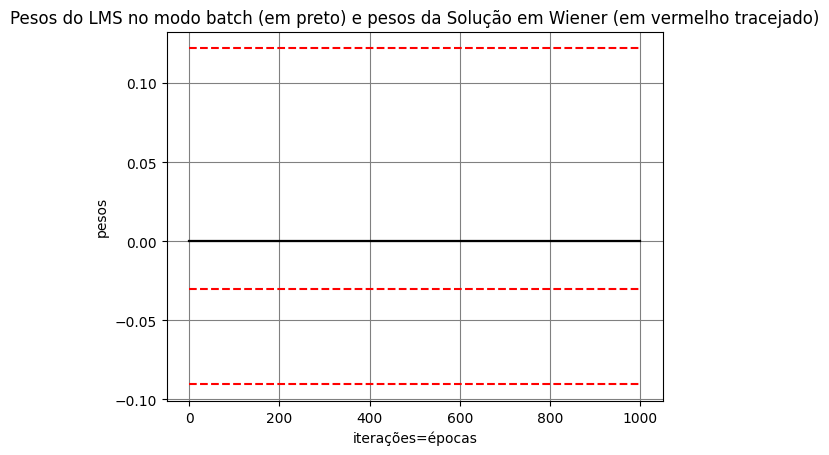

In [ ]:
# Mostra os pesos ao longo do treinamento e compara com Wiener
plt.plot(Wb, "k", label="LMS")
plt.plot(
    [0, Ne],
    [Ww[0], Ww[0]],
    "r--",
    [0, Ne],
    [Ww[1], Ww[1]],
    "r--",
    [0, Ne],
    [Ww[2], Ww[2]],
    "r--",
    label="Wiener",
)
plt.xlabel("iterações=épocas")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos do LMS no modo batch (em preto) e pesos da Solução em Wiener (em vermelho tracejado)"
)

## **Modo mini-batch**

Vamos agora modificar a função anterior para considerar o LMS no modo de treinamento mini-batch.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [ ]:
def LMS_FILTER_minibatch(x, d, eta, Nt, Ne, Nb):
    """
    W = LMS_FILTER_minibatch(x,d,eta,M,Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """

    M = x.shape[1]
    Nmb = int(np.floor(Nt / Nb))
    W = np.zeros((Ne * Nmb + 1, M + 1))
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # No modo mini-batch, o passo de adaptação é dividido por Nb
    eta = eta / Nb
    for k in range(Ne):
        np.random.shuffle(Xd)
        x = Xd[:, 0 : M + 1]
        d = Xd[:, [M + 1]]
        for l in range(Nmb):
            #############
            #dmb =
            #xmb =
            # Note que o índice k usado no site inicia em 1
            #m =
            #emb =
            #W[[m + 1], :] =
            #############
    return W

IndentationError: expected an indented block after 'for' statement on line 28 (ipython-input-2114538545.py, line 37)

Vamos definir o número de épocas, o passo de adaptação e o tamanho do mini-batch e rodar o algoritmo LMS no modo mini-batch.



In [ ]:
Ne = 100
Nb = 20
eta = 1e-3
Wmb = LMS_FILTER_minibatch(x, d, eta, Nt, Ne, Nb)

A seguir comparamos os pesos obtidos com o LMS no modo mini-batch e os pesos da solução de Wiener.

In [ ]:
# Mostra os pesos ao longo do treinamento e compara com Wiener
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(Wmb, "k", label="LMS")
plt.plot(
    [0, Nmb * Ne],
    [Ww[0], Ww[0]],
    "r--",
    [0, Nmb * Ne],
    [Ww[1], Ww[1]],
    "r--",
    [0, Nmb * Ne],
    [Ww[2], Ww[2]],
    "r--",
    label="Wiener",
)
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos do LMS no modo mini-batch (em preto) e pesos da Solução em Wiener (em vermelho tracejado)"
)

## **Comparando os modos de treinamento**

Vamos agora plotar o caminho dos pesos no plano $w_1 \times w_2$ ao longo das iterações

In [ ]:
plt.figure()
plt.plot(We[:, 1], We[:, 2], "o-r", label="estocástico")
plt.plot(Wmb[:, 1], Wmb[:, 2], "o-g", label="mini-batch")
plt.plot(Wb[:, 1], Wb[:, 2], "o-b", label="batch")
plt.xlabel("w_1")
plt.ylabel("w_2")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.legend()

<div class="alert alert-block alert-success">
Complete o código e faça a análise a seguir:
</div>

Usando diferentes valores para o passo de adaptação (1e-2, 1e-3, 1e-4), avaliem  o comportamento do algoritmo nos modos batch e mini batch, a partir do gráfico de pesos x iterações.

In [ ]:
#############


#############